🛠 01 Neural network regression with TensorFlow Exercises

Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [22]:
# Use seaborn for pairplot
!pip install seaborn

In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#prettyprint np
np.set_printoptions(precision=3, suppress=True)

In [42]:
#get boston pricing dataset
# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
#     path='boston_housing.npz', test_split=0.2, seed=113
# )
# from sklearn.datasets import load_boston
# boston_dataset = load_boston()
# # boston_dataset

# boston = pd.DataFrame(boston_dataset, columns=boston_dataset.feature_names)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
        "CRIM",    
        "ZN",  
        "INDUS",   
        "CHAS", 
        "NOX",     
        "RM",     
        "AGE",     
        "DIS",     
        "RAD",     
        "TAX",    
        "PTRATIO",
        "B",
        "LSTAT",  
        "MEDV"
        ]
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values="?", comment="\t",
                          sep=" ", skipinitialspace=True)

#normailize data
# X_train, X_test 

In [43]:
dataset = raw_dataset.copy()
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [44]:
#clean the data
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [45]:
#Split data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

###Inspect the data
**distribution of data**

In [ ]:
sns.pairplot(train_dataset[])

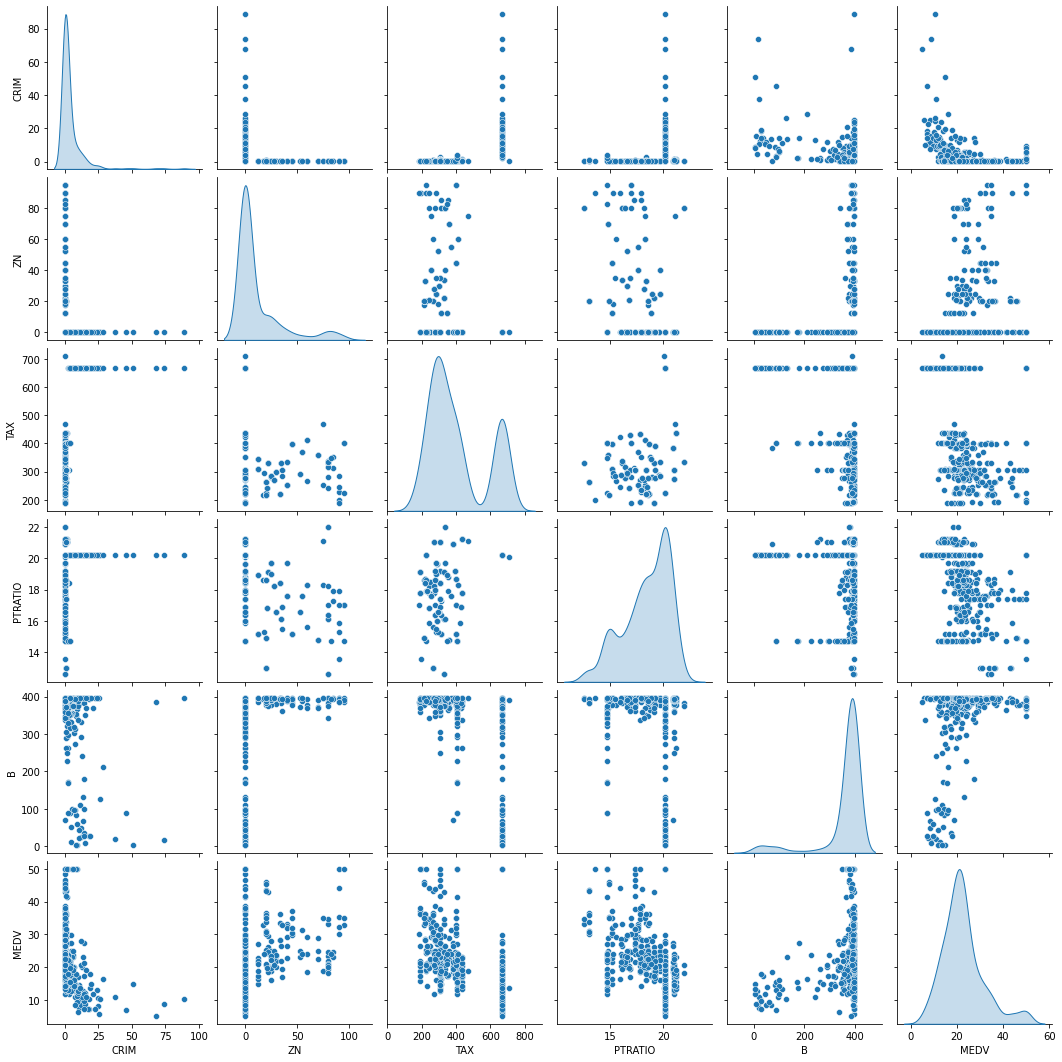

In [48]:
#why normalization/preprocess/scaling is requried 
sns.pairplot(train_dataset[
        ["CRIM",    
        "ZN",  
        "TAX",    
        "PTRATIO",
        "B",
        "MEDV"
        ]
      ], diag_kind="kde")

In [49]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.670339,8.977954,0.00632,0.08265,0.26838,3.47428,88.9762
ZN,405.0,11.067901,22.688396,0.00000,0.00000,0.00000,12.50000,95.0000
INDUS,405.0,11.097951,6.699157,0.74000,5.32000,9.69000,18.10000,27.7400
CHAS,405.0,0.069136,0.253999,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,405.0,0.553098,0.115564,0.38500,0.44900,0.53800,0.62400,0.8710
RM,405.0,6.269768,0.690552,3.56100,5.87800,6.19300,6.61900,8.7800
AGE,405.0,68.241975,27.908527,2.90000,45.00000,76.50000,94.10000,100.0000
DIS,405.0,3.834098,2.162173,1.12960,2.07880,3.27210,5.21460,12.1265
RAD,405.0,9.474074,8.618564,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,405.0,405.839506,164.057951,187.00000,284.00000,334.00000,666.00000,711.0000


In [50]:
#Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("MEDV")
test_labels = test_features.pop("MEDV")

In [51]:
#Normalize
train_dataset.describe().transpose()[["mean", "std"]]

,mean,std
CRIM,3.670339,8.977954
ZN,11.067901,22.688396
INDUS,11.097951,6.699157
CHAS,0.069136,0.253999
NOX,0.553098,0.115564
RM,6.269768,0.690552
AGE,68.241975,27.908527
DIS,3.834098,2.162173
RAD,9.474074,8.618564
TAX,405.839506,164.057951


In [52]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()

In [53]:
normalizer.adapt(np.array(train_features))

In [54]:
print(normalizer.mean.numpy())

[  3.67   11.068  11.098   0.069   0.553   6.27   68.242   3.834   9.474
 405.839  18.437 356.276  12.639]


In [56]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())


First example: [[  0.07   0.     3.24   0.     0.46   6.33  17.2    5.21   4.   430.
   16.9  375.21   7.34]]

Normalized: [[-0.4  -0.49 -1.17 -0.27 -0.81  0.09 -1.83  0.64 -0.64  0.15 -0.72  0.21
  -0.75]]


In [ ]:
#1.create model
boston_model = tf.keras.Sequential([
  normalizer,
  tf.keras.layers.Dense(1)
])

#compile model
boston_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

# #create a callback for earlystopping
# callback=tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

# #fit the model
# boston_model.fit(X_train, y_train, epochs=500, callbacks=[callback])

In [ ]:
%%time
history = horsepower_model.fit(
    train_features["MEDV"], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

In [10]:
#eval the model
boston_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 5.6551 - mae: 5.6551


[5.65511417388916, 5.65511417388916]

In [15]:
X_test[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

In [16]:
boston_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________
